# Tucker Schoos Project 3: Iowa Liquor Sales

## *Note on formatting for P3 -* 

### *Please refer to comments at the top of each cell to follow the flow of my work, I did most of my playing around in scratch pad notebooks so brought it over in logical order of process.* 

xoxo, 
Tucker

In [2]:
## Import Packages ##

% matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import linear_model

from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import r2_score

from sklearn.cross_validation import train_test_split

In [3]:
## Import Data Set ##

df = pd.read_csv('Iowa_Liquor_Sales_reduced.csv')

/Users/TuckerCS/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
## Clean Data ##

# Remove redundant columns

del df['Volume Sold (Gallons)']

# Remove $ from certain columns

df['State Bottle Cost'] = df['State Bottle Cost'].map(lambda x: x.strip().replace('$', ''))
df['State Bottle Retail'] = df['State Bottle Retail'].map(lambda x: x.strip().replace('$', ''))
df['Sale (Dollars)'] = df['Sale (Dollars)'].map(lambda x: x.strip().replace('$', ''))

df['State Bottle Cost'] = df['State Bottle Cost'].astype('float')
df['State Bottle Retail'] = df['State Bottle Retail'].astype('float')
df['Sale (Dollars)'] = df['Sale (Dollars)'].astype('float')

# Convert dates

df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

# Drop or replace bad values
df = df.dropna()

##creating df for bottle sized under 6L 

df_ = df[df['Bottle Volume (ml)'] <= 6000]

In [5]:
## Adding Columns ##

# Margin and Price per liter
df['Profit from Sale'] =  df['Sale (Dollars)'] - (df['State Bottle Cost'] * df['Bottles Sold'])
df['Profit from Sale'] = df['Profit from Sale'].astype('float')
df['Profit per Liter'] = df['Profit from Sale'] / df['Volume Sold (Liters)']
df['Profit per Liter'] = df['Profit per Liter'].astype('float').round(2)
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Profit from Sale,Profit per Liter
0,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,179.88,4.50,60.00,13.33
1,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,2,37.50,2.00,12.50,6.25
2,2016-03-31,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,5.97,8.96,6,53.76,10.50,17.94,1.71
3,2016-03-31,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,2.24,3.36,48,161.28,9.60,53.76,5.60
5,2016-03-31,4988,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,260,17090,Bulleit Bourbon 10YR,750,23.00,34.50,1,34.50,0.75,11.50,15.33


### At this point I chose features to begin plotting correlations with, below are the two I chose to move forward with

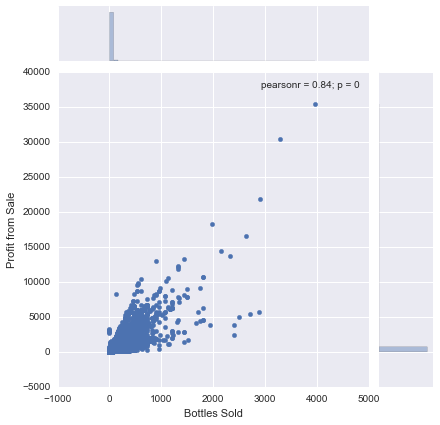

In [7]:
## Scatter plot showing feature#1 'Bottles Sold' against 'Profit from Sale'

sns.jointplot(x=df['Bottles Sold'], y=df['Profit from Sale'], kind='scatter')

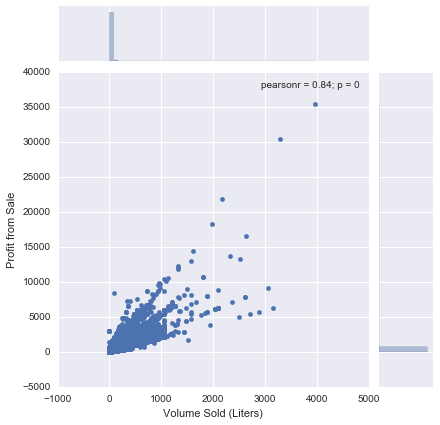

In [8]:
## Scatter plot showing feature#2 'Volume Sold (Liters)' against 'Profit from Sale'

sns.jointplot(x=df['Volume Sold (Liters)'], y=df['Profit from Sale'], kind='scatter')

In [100]:
## separating 2015 (Q1 / Q234) from 2016 (Q1) ##

# 2015 / 2016

x = pd.to_datetime('2015-12-31') 

df2016 = df[df['Date'] > x]
df2015 = df[df['Date'] <= x]

## Q1 2015 DF

y = pd.to_datetime('2015-3-31') 

Q1_15 = df[df['Date'] <= y]

## Q2,Q3,Q4 2015 DF

i = pd.to_datetime('2015-4-1') 

Q234_15 = df2015[df2015['Date'] >= i]

In [101]:
## Making Pivot Tables of everything in full / data / target just in case I need it ##

# Q1 of 2015

salesQ1 = pd.pivot_table(Q1_15, index=['County'], \
                           values=['Bottles Sold', 'Volume Sold (Liters)', 'Profit from Sale'], aggfunc=lambda x: sum(x))

d_salesQ1 = pd.pivot_table(Q1_15, index=['County'], \
                           values=['Bottles Sold', 'Volume Sold (Liters)'], aggfunc=lambda x: sum(x))

t_salesQ1 = pd.pivot_table(Q1_15, index=['County'], \
                           values=['Profit from Sale'], aggfunc=lambda x: sum(x))

# Q234 of 2015

salesQ234 = pd.pivot_table(Q234_15, index=['County'], \
                           values=['Bottles Sold', 'Volume Sold (Liters)', 'Profit from Sale'], aggfunc=lambda x: sum(x))

d_salesQ234 = pd.pivot_table(Q234_15, index=['County'], \
                           values=['Bottles Sold', 'Volume Sold (Liters)'], aggfunc=lambda x: sum(x))

t_salesQ234 = pd.pivot_table(Q234_15, index=['County'], \
                           values=['Profit from Sale'], aggfunc=lambda x: sum(x))

# Q1 of 2016

sales2016 = pd.pivot_table(df2016, index=['County'], \
                           values=['Bottles Sold', 'Volume Sold (Liters)', 'Profit from Sale'], aggfunc=lambda x: sum(x))

d_sales2016 = pd.pivot_table(df2016, index=['County'], \
                           values=['Bottles Sold', 'Volume Sold (Liters)'], aggfunc=lambda x: sum(x))

t_sales2016 = pd.pivot_table(df2016, index=['County'], \
                           values=['Profit from Sale'], aggfunc=lambda x: sum(x))

In [102]:
## Making sure all new DF's measure the same ##

print sales2016.shape
print salesQ1.shape
print salesQ234.shape

(99, 3)
(99, 3)
(99, 3)


       X Shape  Y Shape
Train (66, 3) (66, 1)
Test  (33, 3) (33, 1)
Pre TTS R^2 Score: 0.997907770816
Post TTS R^2 Score: 0.99857884976


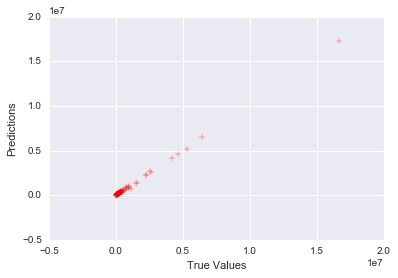

In [103]:
## Modeling ## 

#lm lasso / rr
# x1 = 2015 q1 (total profit by county) DF = Q1_15
# y1 = 2015 q234 total profit by county DF = Q234_15
# fit model to above
# predict y2 (Q234 total profit by county) 
# by x2 (Q1 total profit by county) DF = df2016

### RIDGE REGRESSION ### 

X = salesQ1
y = t_salesQ234
X1 = sales2016

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.33)

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

lrcv = linear_model.RidgeCV()
lrcv_model = lrcv.fit(X,y)
predictions = lrcv_model.predict(X1)
lrcv_r2 =  r2_score(y_true=y, y_pred=lrcv_model.predict(X1))
print "Pre TTS R^2 Score:", lrcv_r2

## The line / model
plt.scatter(y, predictions, s=30, c='r', marker='+', zorder=10)
plt.xlabel("True Values")
plt.ylabel("Predictions")
print "Post TTS R^2 Score:", lrcv_model.score(X,y)
 
lrcv_y1 = lrcv_model.predict(X1)

       X Shape  Y Shape
Train (66, 3) (66, 1)
Test  (33, 3) (33, 1)
Pre TTS R^2 Score: 0.997677111875
Post TTS R^2 Score: 0.998511846868


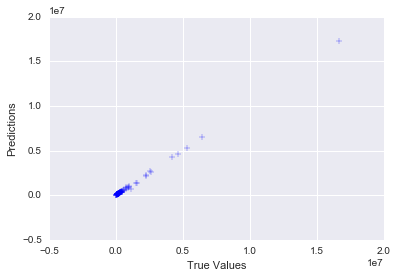

In [104]:
### LASSO ###

X = salesQ1
y = t_salesQ234
X1 = sales2016

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.33)

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

ls = linear_model.Lasso()
ls_model = ls.fit(X,y)
predictions = ls_model.predict(X1)
ls_r2 =  r2_score(y_true=y, y_pred=ls_model.predict(X1))
print "Pre TTS R^2 Score:", ls_r2

## The line / model
plt.scatter(y, predictions, s=30, c='b', marker='+', zorder=10)
plt.xlabel("True Values")
plt.ylabel("Predictions")
print "Post TTS R^2 Score:", ls_model.score(X,y)
 
ls_y1 = ls_model.predict(X1)

In [105]:
## Inputting my Y_Test values (Y1) from my LRCV Model

sales2016['Q2-4 Predicted Prof'] = lrcv_y1
sales2016['Q2-4 Predicted Prof'] = sales2016['Q2-4 Predicted Prof'].round(2)
sales2016.head()

,Bottles Sold,Profit from Sale,Volume Sold (Liters),Q2-4 Predicted Prof
County,,,,
Adair,8436,35187.43,8262.44,133339.97
Adams,1727,7293.89,1643.87,48967.47
Allamakee,13591,59832.68,14839.15,203295.57
Appanoose,14566,59035.98,13713.39,206038.60
Audubon,3350,12417.68,3426.62,56622.79


In [106]:
## reseting index so I can manipulate the columns 
## creating forcast DF which shows Q1 profits vs Q2-4 predictions
## Renaming columns for clarity

sales2016 = sales2016.reset_index()

forcast2016 = sales2016[['County', 'Profit from Sale', 'Q2-4 Predicted Prof']]

forcast2016.rename(columns={'Profit from Sale': '2016 Q1 Profits'}, inplace=True)
forcast2016.rename(columns={'Q2-4 Predicted Prof': '2016 Q234 Forcast'}, inplace=True)

forcast2016['Forcasted Growth%'] = \
(((forcast2016['2016 Q234 Forcast'] - forcast2016['2016 Q1 Profits']) / forcast2016['2016 Q1 Profits'])*100).round(2)

forcast2016.head()

/Users/TuckerCS/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,County,2016 Q1 Profits,2016 Q234 Forcast,Forcasted Growth%
0,Adair,35187.43,133339.97,278.94
1,Adams,7293.89,48967.47,571.35
2,Allamakee,59832.68,203295.57,239.77
3,Appanoose,59035.98,206038.60,249.01
4,Audubon,12417.68,56622.79,355.99


In [157]:
## Doing same as above for 2015

salesQ1 = salesQ1.reset_index()
salesQ234 = salesQ234.reset_index()

growth2015 = salesQ1[['County', 'Profit from Sale']]
growth2015['2015 Q234 Profits'] = salesQ234[['Profit from Sale']]

growth2015.rename(columns={'Profit from Sale': '2015 Q1 Profits'}, inplace=True)

growth2015['2015 Growth%'] = \
(((growth2015['2015 Q234 Profits'] - growth2015['2015 Q1 Profits']) / growth2015['2015 Q1 Profits'])*100).round(2)

growth2015.head()

/Users/TuckerCS/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/TuckerCS/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,County,2015 Q1 Profits,2015 Q234 Profits,2015 Growth%
0,Adair,34635.64,107483.57,210.33
1,Adams,6794.39,26820.39,294.74
2,Allamakee,52241.62,223758.64,328.31
3,Appanoose,50906.19,228425.45,348.72
4,Audubon,13173.47,45140.71,242.66


In [162]:
## Join 2015 / 2016 tables to show County info in a row
county_growth = pd.merge(growth2015, forcast2016)

## Creating 'growth delta' column to show how county's changed between years
county_growth['Growth Delta%'] = \
(((county_growth['Forcasted Growth%'] - county_growth['2015 Growth%']) / county_growth['2015 Growth%'])*100).round(2)

county_growth.sort_values('Growth Delta%', ascending=False, inplace=True)

# Resetting index and dropping old 
county_growth = county_growth.reset_index(drop=True)

## The head will show the top 5 County's by Growth Delta

county_growth.head()

,County,2015 Q1 Profits,2015 Q234 Profits,2015 Growth%,2016 Q1 Profits,2016 Q234 Forcast,Forcasted Growth%,Growth Delta%
0,Fremont,1773.22,6256.70,252.84,1910.32,31762.64,1562.69,518.05
1,Wayne,8897.05,26365.94,196.34,7696.11,49131.59,538.40,174.22
2,Taylor,9384.42,27547.58,193.55,10591.64,58188.23,449.38,132.18
3,Davis,7127.44,25016.62,250.99,6934.00,46006.13,563.49,124.51
4,Adams,6794.39,26820.39,294.74,7293.89,48967.47,571.35,93.85


In [166]:
## Below shows the bottom 5 County's by Growth Delta

county_growth.tail()

,County,2015 Q1 Profits,2015 Q234 Profits,2015 Growth%,2016 Q1 Profits,2016 Q234 Forcast,Forcasted Growth%,Growth Delta%
94,Cerro Gordo,397814.89,1526233.40,283.65,427120.60,1347726.66,215.54,-24.01
95,Allamakee,52241.62,223758.64,328.31,59832.68,203295.57,239.77,-26.97
96,Appanoose,50906.19,228425.45,348.72,59035.98,206038.60,249.01,-28.59
97,Dallas,304256.39,1555024.53,411.09,344405.03,1344440.48,290.37,-29.37
98,Dickinson,220758.16,1105434.96,400.74,218457.85,726626.37,232.62,-41.95


In [159]:
## Trying to understand why Fremont has such a crazy high Growth Delta
# ...no real conclusions 

Fremont = df[df['County']=='Fremont'] 

x = pd.to_datetime('2015-12-31') 
y = pd.to_datetime('2015-3-31') 

F2016 = Fremont[Fremont['Date'] > x]
F2015Q1 = Fremont[Fremont['Date'] <= y]

print 'Fremont Bottles Sold in 2015:', sum(F2015Q1['Bottles Sold'])
print 'Fremont Bottles Sold in 2016:', sum(F2016['Bottles Sold'])
print '\n'
print 'Fremont Sale$ in 2015 Q1:', sum(F2015Q1['Profit from Sale'])
print 'Fremont Sale$ in 2016 Q1:', sum(F2016['Profit from Sale'])
print '\n'
print 'Fremont Volume Sold in 2015 Q1:', sum(F2015Q1['Volume Sold (Liters)'])
print 'Fremont Volume Sold in 2016 Q1:', sum(F2016['Volume Sold (Liters)'])

Fremont Bottles Sold in 2015: 542
Fremont Bottles Sold in 2016: 576


Fremont Sale$ in 2015 Q1: 1773.22
Fremont Sale$ in 2016 Q1: 1910.32


Fremont Volume Sold in 2015 Q1: 369.8
Fremont Volume Sold in 2016 Q1: 394.15


In [163]:
## Saving county_growth DF to CSV so can manipulate in Tableau 
pd.DataFrame(county_growth).to_csv('county_growth2.csv')

# (%) Growth in Profits Btwn 2015 and 2016 Forcasted

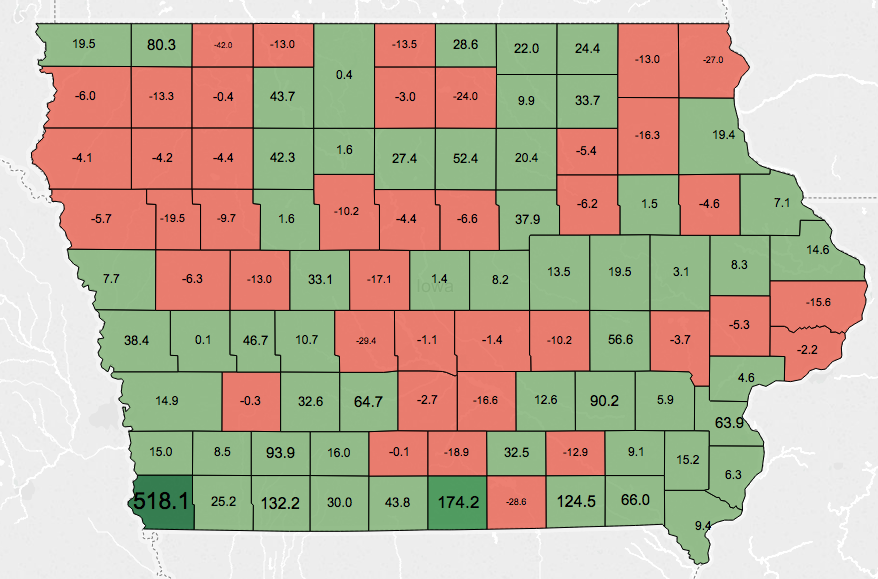

In [168]:
#Pulling in Tableau images
from IPython.display import Image
Image(filename='CG_3.png') 

# Conclusion and Next Steps 

From my analysis above, I have created a list ranking all 99 counties in Iowa by their % increase in profits from 2015 to my forcasted profits for 2016. To do this I created a Ridge Regression model taking three features from Q1 (Bottles Sold, Volume Sold and Profits from Sale) and trained them against Q2-4 Profits. Using this model I input the same three features from Q1 2016 and got projected profits for the remaining year. Using this information I used growth calculations for 2015 and 2016 and then for year-to-year. The result is the above graph, showing Growth% by county for 2015/2016. We can see that Fremont county takes a wild lead above all others, with Wayne, Taylor and Davis all close for 2/3/4. 

On the other side we can see that the biggest decrease in profits is Dickinson county, followed by Dallas, Appanoose and Allamakee. 

Looking at this map we can see that the biggest increases in profit are coming along the southern border / southwestern parts of the state (with the exception of Appanoose county) and the biggest drop offs are coming in the northern half of the state, particularly the northwest. 